In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [2]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time
import seaborn as sns

In [4]:
import shap

## Load dataset

In [5]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'
# path_out = r'E:\Other Projects\Nano particles - Dr. Harinda\nanoproject-visuolization-sliit\output_new_new'
# path_out = r''

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


In [6]:
df_original = pd.DataFrame(features_orig, columns=[ f'feature_{i}' for i in range(35)])
df_norm = pd.DataFrame(features_norm, columns=[ f'feature_{i}' for i in range(35)])

In [7]:
df_original.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,273.0,0.000025,1.0,2.710000e-26,0.0,81.0,119.0,0.0,105.0,229.0,...,8936.0,95.5363,34.169839,24.0,23.0,2.0,8.0,2.5153,2.7535,2.1026
1,273.0,0.000025,2.0,2.780000e-26,0.0,65.0,81.0,1.0,111.0,213.0,...,9090.0,95.5073,34.245992,30.0,35.0,1.0,7.0,2.5335,2.9188,1.8783
2,273.0,0.000025,3.0,7.850000e-26,4.0,204.0,168.0,24.0,306.0,304.0,...,26399.0,96.0506,34.609982,700.0,376.0,0.0,17.0,7.3030,8.4074,4.3813
3,273.0,0.000025,4.0,1.220000e-25,8.0,178.0,246.0,46.0,383.0,282.0,...,40689.0,96.3417,34.742688,1858.0,823.0,0.0,11.0,9.5565,11.0017,5.5250
4,273.0,0.000025,5.0,1.860000e-25,18.0,204.0,269.0,57.0,451.0,328.0,...,62641.0,96.5052,34.859251,3575.0,1350.0,0.0,28.0,9.8630,11.1281,5.5505


In [8]:
df_norm.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,0.0,0.1,0.000000,0.097059,0.000000,0.030440,0.048902,0.000000,0.037433,0.191472,...,0.096273,0.613760,0.265376,0.002188,0.005046,0.666667,0.048780,0.202272,0.207899,0.218424
1,0.0,0.1,0.111111,0.100000,0.000000,0.024427,0.033154,0.001032,0.039725,0.178094,...,0.098170,0.606908,0.308991,0.002735,0.007679,0.333333,0.042683,0.203906,0.221702,0.192378
2,0.0,0.1,0.222222,0.313025,0.002574,0.076663,0.069208,0.024768,0.114209,0.254181,...,0.311345,0.735269,0.517461,0.063816,0.082492,0.000000,0.103659,0.631955,0.680002,0.483029
3,0.0,0.1,0.333333,0.495798,0.005148,0.066892,0.101533,0.047472,0.143621,0.235786,...,0.487339,0.804045,0.593466,0.169386,0.180562,0.000000,0.067073,0.834201,0.896627,0.615837
4,0.0,0.1,0.444444,0.764706,0.011583,0.076663,0.111065,0.058824,0.169595,0.274247,...,0.757697,0.842674,0.660226,0.325918,0.296183,0.000000,0.170732,0.861708,0.907181,0.618798


In [9]:
## check norm and

## Visualize data

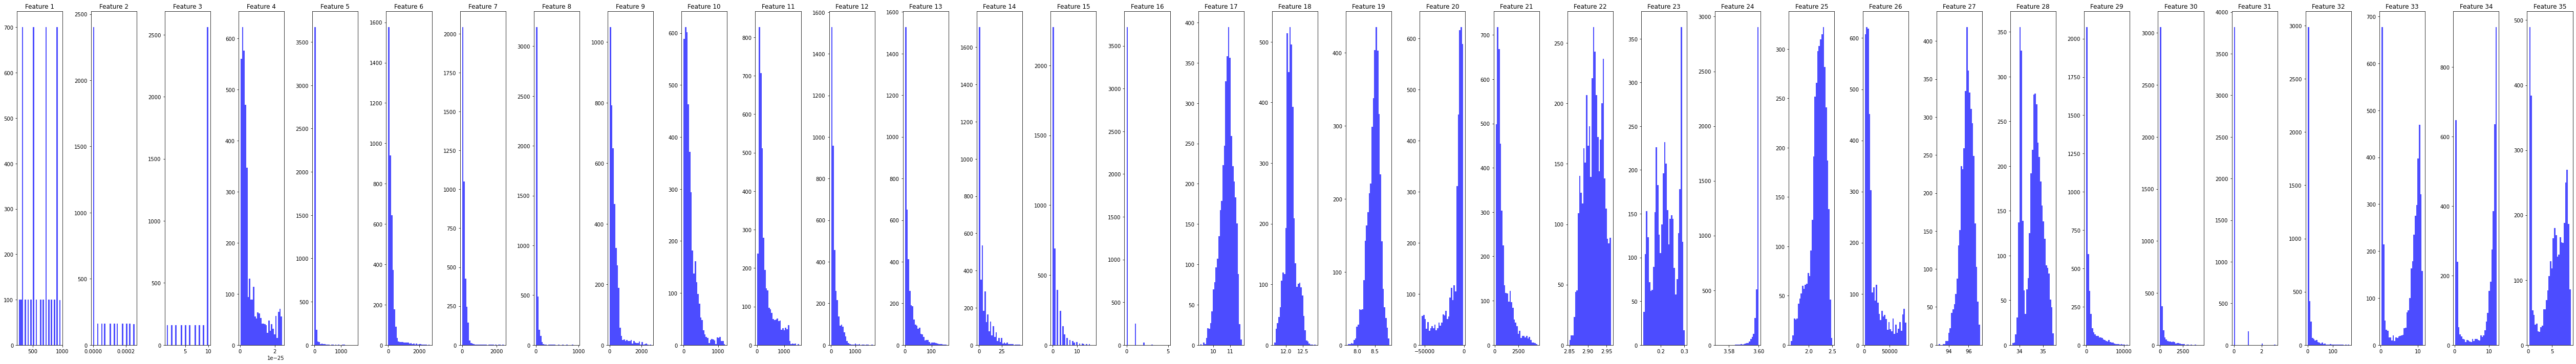

In [9]:
data = features_orig
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()


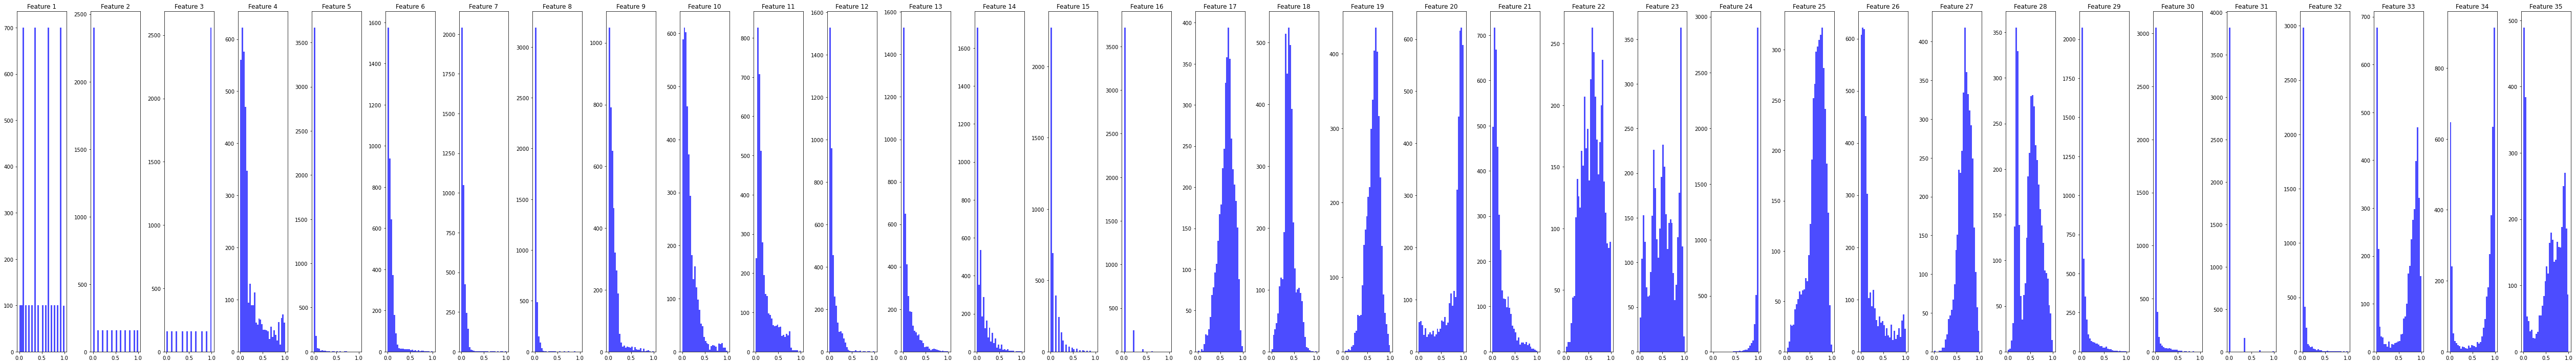

In [10]:
data = features_norm
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

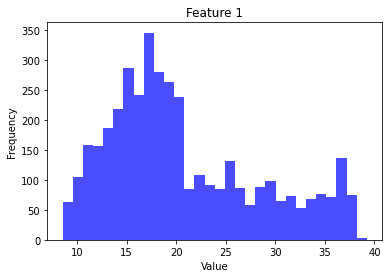

In [11]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [12]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


In [13]:
def calc_MAPE_Percentage(actual_list , predicted_list):
#     assert len(predicted_list.shape) ==2
#     assert isinstance(predicted_list, list)
    assert len(actual_list.shape) == 2
    tmp=0
    num_samples = actual_list.shape[0]

    if len(predicted_list.shape) == 2:
#         print('con1')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i,0]))/(np.abs(actual_list[i,0]))
    elif len(predicted_list.shape) == 1:
#         print('con2')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i]))/(np.abs(actual_list[i,0]))
    else:
        raise AssertionError
    MAPD = tmp/num_samples
    MAPD_perc = MAPD*100
    return MAPD_perc


## Model Training

## ElastiNet Regression

Elastic-Net <br>
Combines L1 and L2 norms

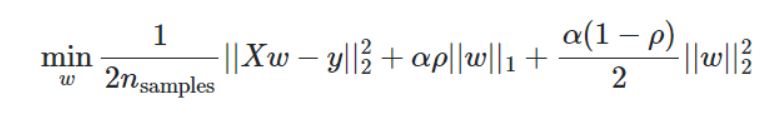

In [15]:
from sklearn.linear_model import ElasticNet


# X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation
alpha = 2.459130e-05
l1_ratio = 9.090909e-02
elastic_net = ElasticNet(alpha=alpha,  l1_ratio=l1_ratio)

In [16]:
elastic_net

ElasticNet(alpha=2.45913e-05, l1_ratio=0.09090909)

In [19]:
predictions_list = {'train':None,'test':None,'val':None}
name = 'ElastiNet'

training_start = time.time()
elastic_net.fit(features_train, labels_train)
training_end = time.time()



val_start = time.time()
y_pred_validation = elastic_net.predict(features_validation)
val_end = time.time()
predictions_list['val'] = y_pred_validation



y_pred_train = elastic_net.predict(features_train)
predictions_list['train'] = y_pred_train

test_start = time.time()
y_pred_test = elastic_net.predict(features_test)
test_end = time.time()
predictions_list['test'] = y_pred_test


#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val'])
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} ,MAPD: {val_mapd:.8f} , R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train'])
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f}, MAPD: {train_mapd:.8f} , R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test'])
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f},MAPD: {test_mapd:.8f} , R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
print("Time taken for testing: {:.10f} seconds".format(test_end - test_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ", mse)
# r2 = r2_score(y_test, y_pred)
# print("R^2 value: ", r2)

# print("Time taken for training and hyper-parameter tuning: {:.2f} seconds".format(training_end - training_start))
# print("Time taken for testing: {:.2f} seconds".format(testing_end - testing_start))

Validation set with ElastiNet - RMSE: 0.5243007369, MSE: 0.2748912627, MAE: 0.3727889122 ,MAPD: 2.06037162 , R^2: 0.9950535950
Train set with ElastiNet - RMSE: 0.4799822690, MSE: 0.2303829785, MAE: 0.3469359442, MAPD: 1.85748737 , R^2: 0.9960120315
Test set with ElastiNet - RMSE: 0.4831832352, MSE: 0.2334660387, MAE: 0.3487019739,MAPD: 1.74488863 , R^2: 0.9961467397
Time taken for training: 0.0735073090 seconds
Time taken for testing: 0.0000000000 seconds
Time taken for validation: 0.0000000000 seconds


Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.99085652961264, tolerance: 18.480465414243948


In [ ]:
## MAPD - test in the paper is not correct. use teh above value
## time taken for testing is also not correct in the paper - use the above




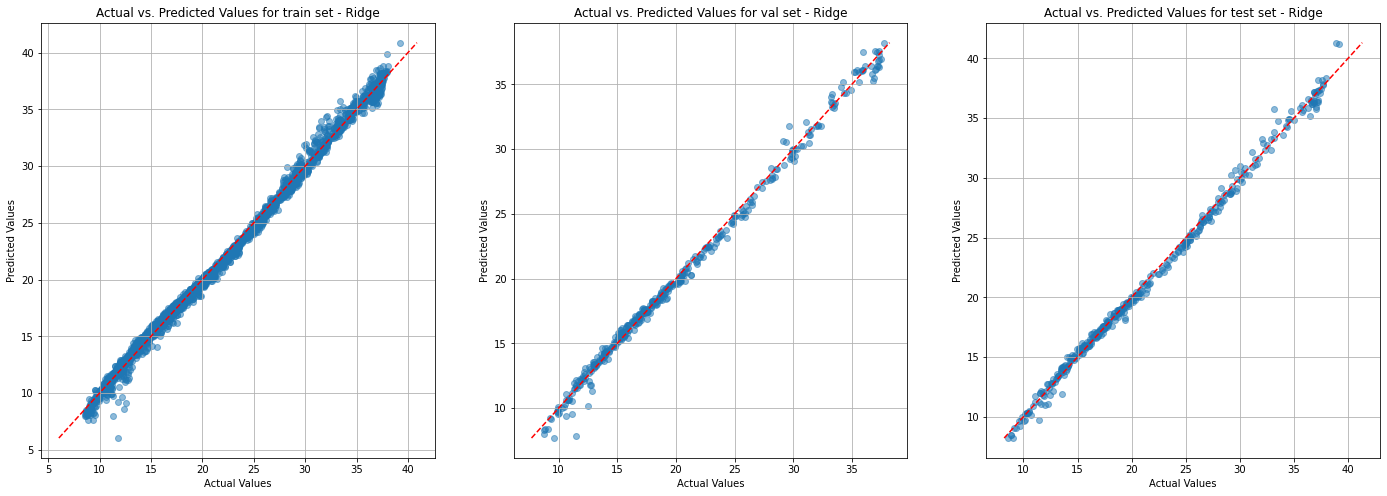

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - Ridge")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

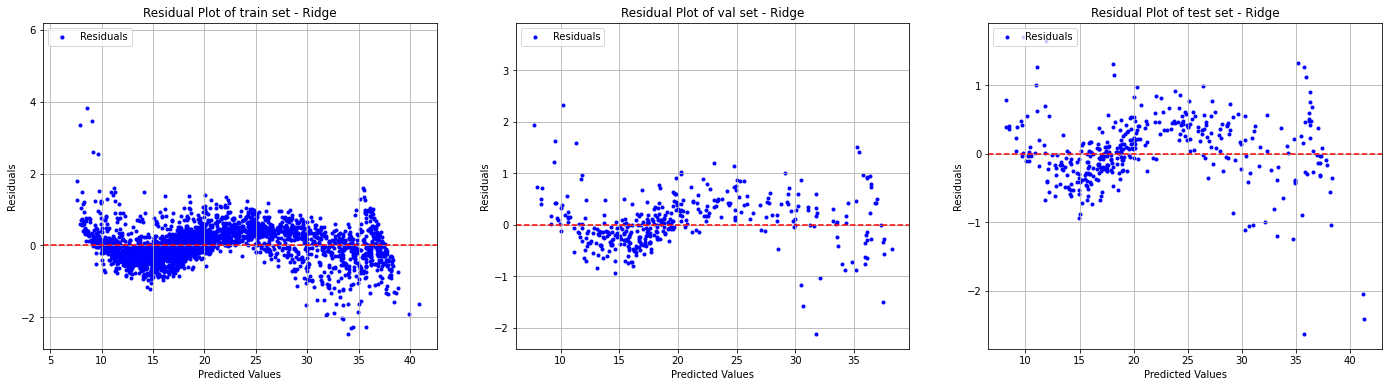

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals

#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Ridge')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


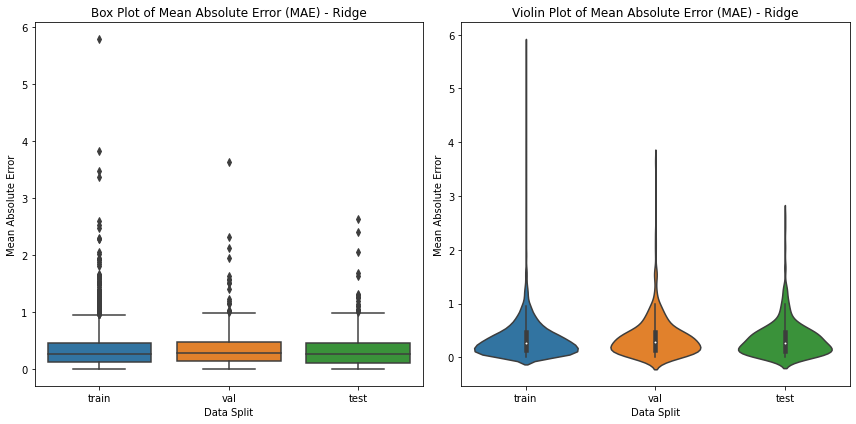

In [23]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])

plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

In [24]:
col_names_str = "T, tau, time, Volume, S_100, S_111, S_110, S_311, Curve_1-10, Curve_11-20, Curve_21-30, Curve_31-40, Curve_41-50, Curve_51-60, Curve_61-70, Curve_71-80, Avg_total, Avg_bulk, Avg_surf, Total_E, Formation_E, Avg_bonds, Std_bonds, Max_bonds, Min_bonds, N_bonds, angle_avg, angle_std, FCC, HCP, ICOS, DECA, q6q6_avg_total, q6q6_avg_bulk, q6q6_avg_surf"
cols = col_names_str.split(',')
cols =[c.strip() for c in cols]
# print(cols)
cols_np = np.array(cols)
print(cols_np)
print(cols_np.shape)

['T' 'tau' 'time' 'Volume' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1-10'
 'Curve_11-20' 'Curve_21-30' 'Curve_31-40' 'Curve_41-50' 'Curve_51-60'
 'Curve_61-70' 'Curve_71-80' 'Avg_total' 'Avg_bulk' 'Avg_surf' 'Total_E'
 'Formation_E' 'Avg_bonds' 'Std_bonds' 'Max_bonds' 'Min_bonds' 'N_bonds'
 'angle_avg' 'angle_std' 'FCC' 'HCP' 'ICOS' 'DECA' 'q6q6_avg_total'
 'q6q6_avg_bulk' 'q6q6_avg_surf']
(35,)


## Shap Analysis

### Converting numpys to dataframes

In [27]:
pd.options.display.max_columns = None
features_train_df = pd.DataFrame(features_train, columns=cols)
features_train_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.357143,0.0,1.0,0.121008,0.057915,0.107854,0.020307,0.029928,0.148205,0.102843,0.059438,0.001174,0.000000,0.000000,0.0,0.0,0.666721,0.328632,0.563220,0.881721,0.097807,0.392482,0.266821,0.996049,0.818133,0.115757,0.797784,0.641690,0.074483,0.056823,0.0,0.060976,0.907309,0.952472,0.863790
1,0.071429,0.0,1.0,0.094118,0.000000,0.140549,0.044758,0.033024,0.139037,0.069398,0.059438,0.021139,0.000000,0.000000,0.0,0.0,0.604777,0.326268,0.700351,0.906289,0.061205,0.235131,0.082807,0.988147,0.903067,0.089253,0.816472,0.725791,0.059987,0.049144,0.0,0.085366,0.908386,0.949666,0.944866
2,0.928571,0.0,1.0,0.128151,0.000000,0.113115,0.025280,0.002064,0.130634,0.169732,0.062704,0.027598,0.025641,0.022222,0.0,0.0,0.700475,0.471058,0.726992,0.879346,0.161850,0.741993,0.696828,0.998204,0.597269,0.123762,0.668383,0.442706,0.018324,0.016235,0.0,0.012195,0.728838,0.827630,0.562978
3,0.928571,0.0,1.0,0.115126,0.000000,0.051484,0.020721,0.004128,0.081742,0.141304,0.103201,0.042866,0.025641,0.044444,0.0,0.0,0.677566,0.433393,0.627610,0.892252,0.151954,0.756526,0.743001,0.992816,0.549163,0.110572,0.647262,0.485310,0.017322,0.002852,0.0,0.000000,0.664866,0.803323,0.380958
4,0.928571,0.0,1.0,0.006261,0.000000,0.001879,0.010361,0.004128,0.004966,0.051003,0.036577,0.014680,0.019231,0.000000,0.0,0.0,0.267679,0.425648,0.298146,0.994267,0.021339,0.698753,0.959020,0.985273,0.661096,0.005949,0.275268,0.149671,0.000000,0.000000,0.0,0.000000,0.047440,0.050969,0.058316


In [28]:
features_test_df = pd.DataFrame(features_test, columns=cols)
features_test_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.642857,0.0,1.0,0.137815,0.034106,0.067644,0.030253,0.009288,0.141329,0.089465,0.094056,0.044040,0.025641,0.044444,0.000000,0.0,0.699216,0.434861,0.629781,0.867766,0.144070,0.586346,0.534771,0.970905,0.708974,0.132962,0.709989,0.586149,0.057617,0.015358,0.0,0.000000,0.830782,0.930319,0.641046
1,0.071429,0.0,1.0,0.113025,0.000000,0.197670,0.048902,0.000000,0.198625,0.000836,0.041803,0.037581,0.000000,0.000000,0.000000,0.0,0.634551,0.331812,0.739686,0.887331,0.070192,0.262313,0.068921,0.719828,0.892165,0.107702,0.846525,0.957676,0.097912,0.000000,0.0,0.000000,0.944114,0.984828,0.971144
2,0.928571,0.0,1.0,0.044118,0.000000,0.003382,0.012433,0.007224,0.010313,0.113712,0.081646,0.029360,0.070513,0.022222,0.000000,0.0,0.457858,0.262922,0.443878,0.959670,0.078529,0.798152,0.934918,0.971264,0.556526,0.040876,0.481406,0.177720,0.000000,0.000000,0.0,0.000000,0.024286,0.024908,0.031550
3,1.000000,0.9,0.0,0.021807,0.000000,0.001127,0.003315,0.002064,0.009549,0.078595,0.045069,0.022901,0.089744,0.111111,0.058824,0.0,0.197612,0.026333,0.000000,0.979421,0.037220,0.707365,0.993283,0.946121,0.330810,0.018708,0.444691,0.093384,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004378
4,0.928571,0.0,1.0,0.158403,0.003218,0.090192,0.018235,0.006192,0.123377,0.184783,0.095363,0.032883,0.070513,0.044444,0.058824,0.0,0.719160,0.418718,0.648071,0.851018,0.195826,0.774468,0.692651,0.993894,0.675868,0.152926,0.685985,0.500107,0.027806,0.018210,0.0,0.036585,0.716461,0.814078,0.491552


### SHAP value calculation

In [29]:
type(elastic_net)

sklearn.linear_model._coordinate_descent.ElasticNet

In [30]:
# features_train
train_feature_sample_df = shap.utils.sample(features_train_df, 2500)
print(train_feature_sample_df.shape)

LR_model = elastic_net

# explainer__ = shap.Explainer(LR_model.predict, train_feature_sample_df) #this was probly from chatgpt!
explainer__ = shap.Explainer(LR_model, train_feature_sample_df)
shap_values = explainer__(features_test_df)
print(shap_values.feature_names)

(2500, 35)
['T', 'tau', 'time', 'Volume', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'Total_E', 'Formation_E', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf']


### SHAP to Dataframe

In [31]:
#shap values converted to a dataframe

print(type(shap_values))
print(type(shap_values.values))
shap_values_df = pd.DataFrame(shap_values.values, columns=cols)
shap_values_abs_df = shap_values_df.abs()
shap_values_df.head()

<class 'shap._explanation.Explanation'>
<class 'numpy.ndarray'>


,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.097882,-0.175871,-0.026597,-2.387185,0.191417,-0.044279,-0.015932,0.010915,0.505177,-0.860668,-1.627256,-0.632447,-0.119349,0.025215,-0.03415,-0.00392,0.658992,-0.084462,0.001472,1.677210,-0.048457,-0.024872,0.000538,0.004453,-0.000454,0.811651,0.021156,0.081232,0.026447,0.000143,0.001841,0.059268,0.827778,-0.644612,-0.183065
1,-0.206335,-0.175871,-0.026597,-2.878675,-0.065877,0.880319,-0.008092,0.017073,1.321383,-1.833796,-2.315277,-0.701395,-0.144635,0.039665,-0.03415,-0.00392,-0.130357,0.307878,-0.099052,1.946544,-0.148007,0.336240,-0.010112,-0.135831,-0.001869,0.983920,0.127125,0.449758,0.004737,0.000190,0.001841,0.059268,1.338592,-0.805282,-0.882420
2,0.249990,-0.175871,-0.026597,-4.244851,-0.065877,-0.501234,-0.023424,0.012283,-1.361214,-0.594434,-1.790661,-0.789148,-0.075099,0.032440,-0.03415,-0.00392,-2.287183,0.570163,0.171508,2.942325,-0.136773,-0.260915,0.009686,0.004654,0.000723,1.439663,-0.156253,-0.323898,0.057490,0.000190,0.001841,0.059268,-2.807265,2.024164,1.108232
3,0.288017,0.472833,0.117606,-4.687192,-0.065877,-0.517268,-0.027258,0.015705,-1.372096,-0.980013,-2.272276,-0.858097,-0.056135,0.003540,-0.00253,-0.00392,-5.463914,1.470931,0.577500,3.214218,-0.192437,-0.159739,0.011020,-0.009394,0.002467,1.590850,-0.184749,-0.407553,0.057490,0.000190,0.001841,0.059268,-2.916725,2.097583,1.165800
4,0.249990,-0.175871,-0.026597,-1.978998,-0.041604,0.116056,-0.020985,0.012967,0.249432,0.185904,-1.610055,-0.751540,-0.075099,0.025215,-0.00253,-0.00392,0.902441,-0.023003,-0.015257,1.446670,0.021282,-0.234521,0.004147,0.017298,-0.000199,0.675499,0.002526,-0.004115,0.042509,0.000134,0.001841,0.020907,0.312514,-0.301983,0.133658


In [32]:
shap_values_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.008290,-0.014776,0.002283,-0.092408,0.038364,0.058476,-0.005248,-0.001991,0.139326,-0.005256,-0.092883,-0.135829,-0.020956,0.001048,0.003715,0.000368,0.073752,0.071552,-0.001103,0.071470,0.004647,-0.008917,0.000069,0.001772,-0.000006,0.033655,0.006983,0.007640,0.000670,0.000035,-0.002531,0.012963,-0.039964,0.044608,0.001838
std,0.170486,0.230880,0.044541,5.448407,0.324080,0.835761,0.026281,0.044132,1.826254,1.702063,2.686146,1.065783,0.147469,0.049616,0.068150,0.015111,1.987020,0.501449,0.140144,3.752494,0.228183,0.242724,0.006021,0.032749,0.001476,1.855760,0.109998,0.216974,0.088918,0.000347,0.022619,0.119294,1.587311,1.113646,0.688931
min,-0.244362,-0.175871,-0.026597,-5.119537,-0.065877,-0.522612,-0.028652,-0.483146,-1.480924,-1.842976,-2.753890,-1.083747,-0.144635,-0.285459,-0.034150,-0.003920,-5.886851,-1.533078,-0.318739,-10.169739,-0.239644,-0.476463,-0.011494,-0.220523,-0.002498,-5.101423,-0.330857,-0.409760,-0.460076,-0.002116,-0.274272,-0.970093,-2.916725,-0.831052,-0.928327
25%,-0.168308,-0.175871,-0.026597,-3.811673,-0.065877,-0.389668,-0.019765,-0.002771,-0.925904,-1.200344,-1.954066,-0.815788,-0.125671,-0.025360,-0.034150,-0.003920,-1.071923,-0.125046,-0.094278,-1.314183,-0.160357,-0.211277,-0.004376,0.000640,-0.001020,-0.679532,-0.056556,-0.155638,-0.001465,0.000087,0.001841,0.020907,-1.039994,-0.750157,-0.560672
50%,-0.016200,-0.175871,-0.026597,-2.628765,-0.051313,-0.132463,-0.013319,0.009546,-0.313749,-0.530171,-1.278945,-0.544694,-0.081420,0.021603,-0.034150,-0.003920,0.324312,0.076634,-0.022933,1.817132,-0.077916,-0.009376,-0.000079,0.014287,-0.000231,0.896315,0.015068,0.040504,0.039046,0.000174,0.001841,0.059268,0.728167,-0.576005,-0.177149
75%,0.135909,0.130462,0.021470,2.027897,0.006942,0.168165,-0.000294,0.014336,0.566392,0.727551,0.952823,0.108751,0.040268,0.039665,0.029091,-0.003920,1.468174,0.336202,0.079176,2.612485,0.125356,0.170006,0.004641,0.018903,0.000669,1.293285,0.083323,0.150707,0.056017,0.000190,0.001841,0.059268,1.127893,0.667803,0.599744
max,0.288017,0.544911,0.117606,14.623375,2.701253,6.379811,0.214932,0.017073,12.296629,8.549298,9.406882,5.961548,0.670834,0.039665,0.440156,0.094088,4.315680,1.482105,0.577500,3.487752,0.933323,0.595478,0.011020,0.020709,0.005022,1.714571,0.231554,0.475306,0.057490,0.000190,0.001841,0.059268,1.573208,2.097583,1.165800


In [33]:
shap_values_abs_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.150241,0.201141,0.036322,4.310359,0.116322,0.440723,0.018364,0.018687,1.102261,1.265009,2.153554,0.832367,0.118884,0.038017,0.043943,0.007581,1.559382,0.377789,0.108657,2.961552,0.174397,0.200541,0.005021,0.021107,1.127874e-03,1.462313,0.086842,0.179459,0.063153,0.000231,0.006056,0.072121,1.344382,0.938261,0.587594
std,0.080656,0.113865,0.025818,3.326852,0.304858,0.712181,0.019499,0.040019,1.461725,1.137009,1.604560,0.678100,0.089545,0.031842,0.052177,0.013071,1.231234,0.336899,0.088349,2.300773,0.146965,0.136664,0.003315,0.025080,9.502443e-04,1.140728,0.067734,0.121860,0.062518,0.000261,0.021937,0.095838,0.842179,0.599718,0.358465
min,0.016200,0.031714,0.005448,0.003624,0.002087,0.001149,0.000098,0.000034,0.004571,0.002295,0.001806,0.000627,0.000759,0.003540,0.002530,0.003920,0.004418,0.000034,0.000403,0.015407,0.000304,0.000722,0.000015,0.000038,7.671589e-08,0.017586,0.000050,0.001178,0.000519,0.000005,0.001841,0.001726,0.040097,0.034273,0.009935
25%,0.092254,0.175871,0.026597,2.497562,0.041604,0.145825,0.009790,0.008177,0.408538,0.624271,1.247941,0.469477,0.062456,0.025215,0.029091,0.003920,0.557755,0.107052,0.043321,1.719270,0.094408,0.082444,0.002036,0.012280,3.797992e-04,0.851190,0.032520,0.069948,0.032022,0.000148,0.001841,0.051276,0.756604,0.589616,0.258002
50%,0.135909,0.175871,0.026597,3.553433,0.061022,0.332882,0.016891,0.012967,0.838842,1.115425,1.790661,0.751540,0.113028,0.032512,0.034150,0.003920,1.244761,0.284288,0.086164,2.435256,0.150952,0.187655,0.004563,0.017699,9.145831e-04,1.197765,0.070643,0.153515,0.050859,0.000188,0.001841,0.059268,1.124405,0.748822,0.569694
75%,0.211963,0.178033,0.026597,4.660327,0.065877,0.472507,0.021551,0.015705,1.277852,1.596251,2.392679,0.952118,0.144635,0.039665,0.034150,0.003920,2.292602,0.538570,0.151701,3.170011,0.207865,0.304762,0.008381,0.019907,1.611910e-03,1.573931,0.127368,0.289471,0.057490,0.000190,0.001841,0.059268,1.512491,0.826345,0.861527
max,0.288017,0.544911,0.117606,14.623375,2.701253,6.379811,0.214932,0.483146,12.296629,8.549298,9.406882,5.961548,0.670834,0.285459,0.440156,0.094088,5.886851,1.533078,0.577500,10.169739,0.933323,0.595478,0.011494,0.220523,5.021816e-03,5.101423,0.330857,0.475306,0.460076,0.002116,0.274272,0.970093,2.916725,2.097583,1.165800


In [34]:
sorted_columns = shap_values_abs_df.describe().loc['mean'].sort_values(ascending=False).index
shap_values_abs_df_describe_sorted = shap_values_abs_df.describe()[sorted_columns]
shap_values_abs_df_describe_sorted

,Volume,Total_E,Curve_21-30,Avg_total,N_bonds,q6q6_avg_total,Curve_11-20,Curve_1-10,q6q6_avg_bulk,Curve_31-40,q6q6_avg_surf,S_111,Avg_bulk,tau,Avg_bonds,angle_std,Formation_E,T,Curve_41-50,S_100,Avg_surf,angle_avg,DECA,FCC,Curve_61-70,Curve_51-60,time,Max_bonds,S_311,S_110,Curve_71-80,ICOS,Std_bonds,Min_bonds,HCP
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000
mean,4.310359,2.961552,2.153554,1.559382,1.462313,1.344382,1.265009,1.102261,0.938261,0.832367,0.587594,0.440723,0.377789,0.201141,0.200541,0.179459,0.174397,0.150241,0.118884,0.116322,0.108657,0.086842,0.072121,0.063153,0.043943,0.038017,0.036322,0.021107,0.018687,0.018364,0.007581,0.006056,0.005021,1.127874e-03,0.000231
std,3.326852,2.300773,1.604560,1.231234,1.140728,0.842179,1.137009,1.461725,0.599718,0.678100,0.358465,0.712181,0.336899,0.113865,0.136664,0.121860,0.146965,0.080656,0.089545,0.304858,0.088349,0.067734,0.095838,0.062518,0.052177,0.031842,0.025818,0.025080,0.040019,0.019499,0.013071,0.021937,0.003315,9.502443e-04,0.000261
min,0.003624,0.015407,0.001806,0.004418,0.017586,0.040097,0.002295,0.004571,0.034273,0.000627,0.009935,0.001149,0.000034,0.031714,0.000722,0.001178,0.000304,0.016200,0.000759,0.002087,0.000403,0.000050,0.001726,0.000519,0.002530,0.003540,0.005448,0.000038,0.000034,0.000098,0.003920,0.001841,0.000015,7.671589e-08,0.000005
25%,2.497562,1.719270,1.247941,0.557755,0.851190,0.756604,0.624271,0.408538,0.589616,0.469477,0.258002,0.145825,0.107052,0.175871,0.082444,0.069948,0.094408,0.092254,0.062456,0.041604,0.043321,0.032520,0.051276,0.032022,0.029091,0.025215,0.026597,0.012280,0.008177,0.009790,0.003920,0.001841,0.002036,3.797992e-04,0.000148
50%,3.553433,2.435256,1.790661,1.244761,1.197765,1.124405,1.115425,0.838842,0.748822,0.751540,0.569694,0.332882,0.284288,0.175871,0.187655,0.153515,0.150952,0.135909,0.113028,0.061022,0.086164,0.070643,0.059268,0.050859,0.034150,0.032512,0.026597,0.017699,0.012967,0.016891,0.003920,0.001841,0.004563,9.145831e-04,0.000188
75%,4.660327,3.170011,2.392679,2.292602,1.573931,1.512491,1.596251,1.277852,0.826345,0.952118,0.861527,0.472507,0.538570,0.178033,0.304762,0.289471,0.207865,0.211963,0.144635,0.065877,0.151701,0.127368,0.059268,0.057490,0.034150,0.039665,0.026597,0.019907,0.015705,0.021551,0.003920,0.001841,0.008381,1.611910e-03,0.000190
max,14.623375,10.169739,9.406882,5.886851,5.101423,2.916725,8.549298,12.296629,2.097583,5.961548,1.165800,6.379811,1.533078,0.544911,0.595478,0.475306,0.933323,0.288017,0.670834,2.701253,0.577500,0.330857,0.970093,0.460076,0.440156,0.285459,0.117606,0.220523,0.483146,0.214932,0.094088,0.274272,0.011494,5.021816e-03,0.002116


In [35]:
tmp__ = shap_values_abs_df_describe_sorted.loc[['mean','std']]
tmp__.to_csv('LR_ElastiNet_summary_shap_descending_order.csv', index=False)
tmp__.head()

,Volume,Total_E,Curve_21-30,Avg_total,N_bonds,q6q6_avg_total,Curve_11-20,Curve_1-10,q6q6_avg_bulk,Curve_31-40,q6q6_avg_surf,S_111,Avg_bulk,tau,Avg_bonds,angle_std,Formation_E,T,Curve_41-50,S_100,Avg_surf,angle_avg,DECA,FCC,Curve_61-70,Curve_51-60,time,Max_bonds,S_311,S_110,Curve_71-80,ICOS,Std_bonds,Min_bonds,HCP
mean,4.310359,2.961552,2.153554,1.559382,1.462313,1.344382,1.265009,1.102261,0.938261,0.832367,0.587594,0.440723,0.377789,0.201141,0.200541,0.179459,0.174397,0.150241,0.118884,0.116322,0.108657,0.086842,0.072121,0.063153,0.043943,0.038017,0.036322,0.021107,0.018687,0.018364,0.007581,0.006056,0.005021,0.001128,0.000231
std,3.326852,2.300773,1.604560,1.231234,1.140728,0.842179,1.137009,1.461725,0.599718,0.678100,0.358465,0.712181,0.336899,0.113865,0.136664,0.121860,0.146965,0.080656,0.089545,0.304858,0.088349,0.067734,0.095838,0.062518,0.052177,0.031842,0.025818,0.025080,0.040019,0.019499,0.013071,0.021937,0.003315,0.000950,0.000261


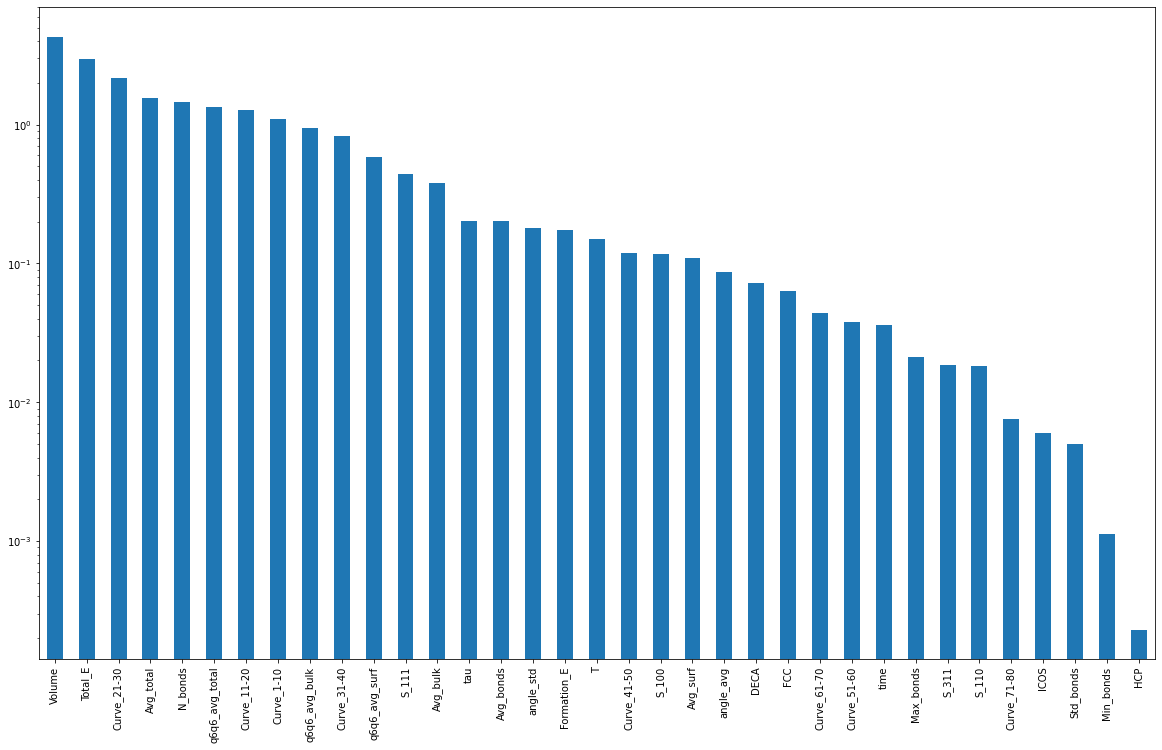

In [36]:
plt.figure(figsize=(20, 12))
shap_values_abs_df_describe_sorted.loc['mean'].plot(kind='bar',logy=True)
plt.show()

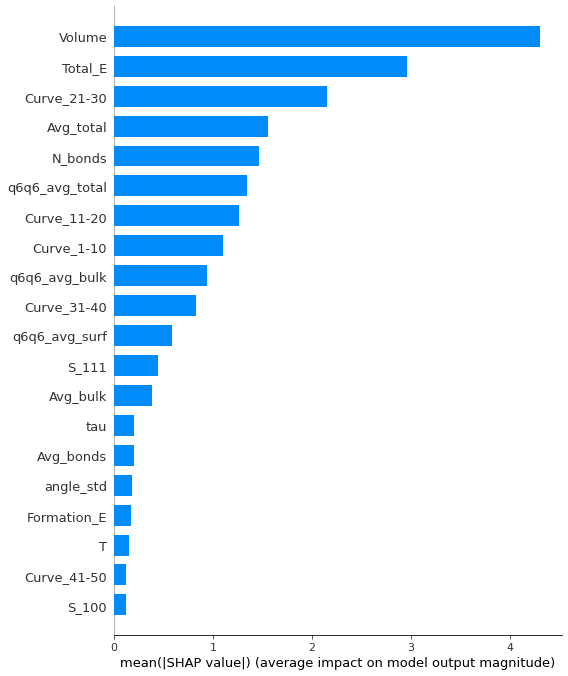

In [37]:
#SHAP API for the above bar plot -same results but nnot in log scale
shap.summary_plot(shap_values, features_test_df, plot_type="bar")

In [38]:
print(features_test.shape)
print(predictions_list['test'][0]) # predicted value
print(labels_test[0]) #original labels
print(set_d)

(400, 35)
19.30570174518099
[19.7274]
['train', 'val', 'test']


In [39]:
test_residu = []
for i in range(labels_test.shape[0]):
    test_residu.append((labels_test[i] - predictions_list['test'][i])[0])

In [40]:
test_residu_np = np.array(test_residu)
test_residu_np_abs = np.abs(test_residu_np)
print(test_residu_np.shape)
print(test_residu_np_abs.sum()/400) #sanity test to check if we get the MAE loss correctly
sorted_indices = np.argsort(test_residu_np_abs)
print(sorted_indices[:10])

(400,)
0.3487019739064834
[ 46 312 348 316 273 229  44 373 128 218]


In [41]:
len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

#we need the corrosponding shap values
best_10 = shap_values[best_set_ind]
worst_10 = shap_values[worst_set_ind]

print(best_10.shape)
print(worst_10.shape)

best_10_values = test_residu_np[list(best_set_ind)] #best 10% of residual values - closest to zero
worst_10_values = test_residu_np[list(worst_set_ind)] #worst 10% of residual values - furthest from zero

print(best_10_values.shape)
print(worst_10_values.shape)

(40, 35)
(40, 35)
(40,)
(40,)


In [42]:
best_10_values

array([ 0.00067828, -0.00187278,  0.00227287, -0.00356503,  0.00417094,
        0.0068284 , -0.00829345, -0.00884521,  0.00928173,  0.01243865,
        0.01324405,  0.01382168,  0.01442092,  0.01464771, -0.01595818,
        0.01641761,  0.01646874, -0.01878561,  0.02059004, -0.02068368,
        0.02123987, -0.02224749,  0.02542512,  0.02571961, -0.02624449,
        0.0263819 , -0.02686215,  0.02708306, -0.02716601,  0.03286445,
       -0.03299942,  0.0330567 , -0.03325205, -0.03367717, -0.03548192,
        0.0359096 , -0.03628785,  0.03722787, -0.03725387, -0.03741628])

In [43]:
worst_10_values


array([ 0.71372578,  0.71884985, -0.72583394, -0.73452878,  0.75594074,
        0.76614264,  0.77271656,  0.77714813,  0.80551847, -0.81163417,
        0.83303546,  0.8432466 ,  0.85782878, -0.86507218, -0.87760421,
       -0.89627359,  0.89844171,  0.91112989, -0.94482884,  0.97091636,
        0.98702547, -0.99187438,  1.002004  , -1.03973381, -1.0467719 ,
       -1.06216138, -1.10660529,  1.11264479,  1.15061269, -1.20073208,
       -1.24952591,  1.25993   ,  1.26971931,  1.30173967,  1.32193299,
        1.63835144,  1.69405285, -2.04972076, -2.41387651, -2.62944916])

### Best/Worst distribution on residual plots

In [ ]:
##

# SHAP results

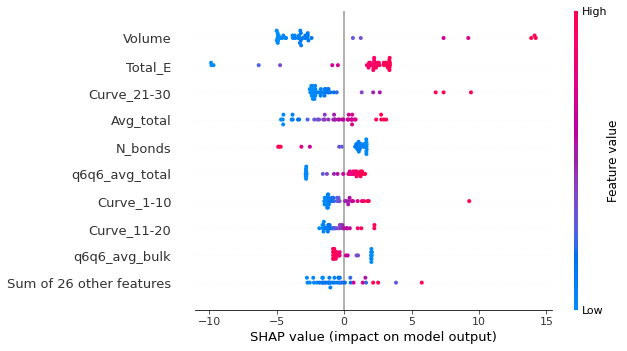

In [44]:
shap.plots.beeswarm(best_10,max_display=10)

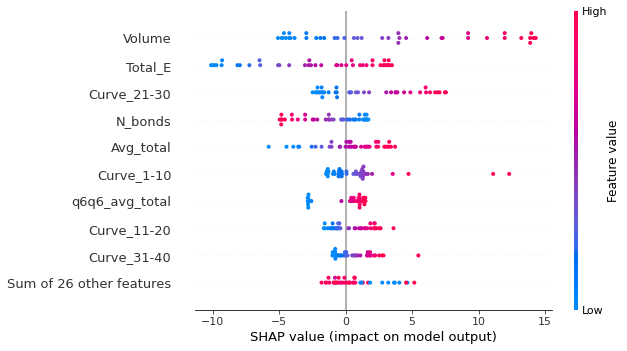

In [45]:
shap.plots.beeswarm(worst_10,max_display=10)

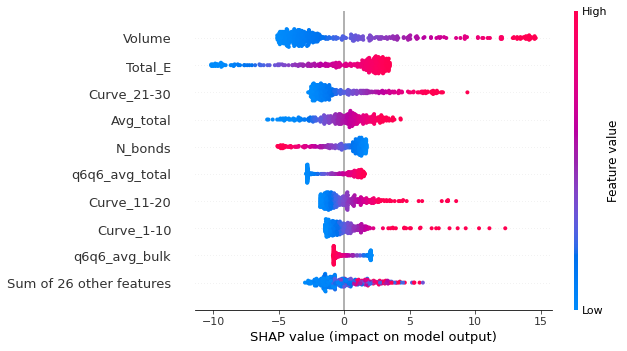

In [46]:
shap.plots.beeswarm(shap_values,max_display=10)

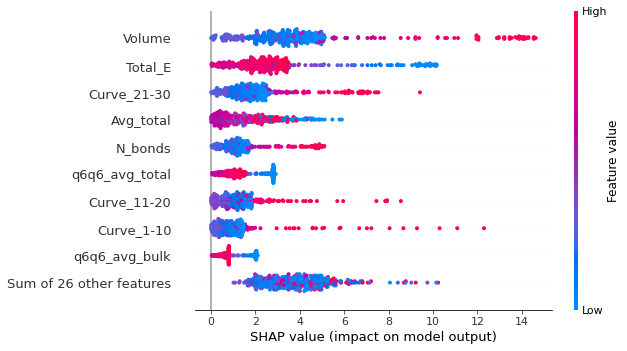

In [47]:
shap.plots.beeswarm(shap_values.abs, max_display=10)

In [48]:
shap_values[12]


.values =
array([ 2.49989902e-01, -1.75870816e-01, -2.65974772e-02, -3.22021891e+00,
       -6.58771097e-02, -5.01234030e-01, -2.08108605e-02,  1.09145040e-02,
       -1.23062059e+00,  1.49182376e-01, -1.18864242e+00, -5.82302423e-01,
       -7.50989637e-02,  1.07652357e-02, -3.41500381e-02, -3.92031868e-03,
       -1.09473047e+00,  7.57331106e-01,  1.05204367e-01,  2.28510322e+00,
       -4.18808976e-02, -2.82309567e-01,  8.88685550e-03,  1.89032131e-02,
        8.04117477e-04,  1.10789258e+00, -1.07513979e-01, -2.79858909e-01,
        5.74902312e-02,  1.90438982e-04,  1.84075301e-03,  5.92681883e-02,
       -2.80681964e+00,  2.01663257e+00,  1.12343586e+00])

.base_values =
array([21.21649271])

.data =
array([0.92857143, 0.        , 1.        , 0.09579832, 0.        ,
       0.00338219, 0.01864898, 0.00928793, 0.01948052, 0.18143813,
       0.12736773, 0.04873752, 0.07051282, 0.08888889, 0.        ,
       0.        , 0.55554653, 0.21376162, 0.5163688 , 0.91192593,
       0.1489508 

### SHAP for a given sample

In [49]:
shap_values[12].base_values[0]

21.216492708590582

In [50]:
shap.plots.waterfall(shap_values[12])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [51]:
print(labels_test[12])
print(labels_test[12] - predictions_list['test'][12])
print(predictions_list['test'][12])
print(sum(predictions_list['test'])/400)
# print(sum(labels_test)/400)

[17.5341]
[0.09222919]
17.44187080519852
21.378151028604535


# SHAP Full view

In [52]:
features_num = best_10.shape[1]

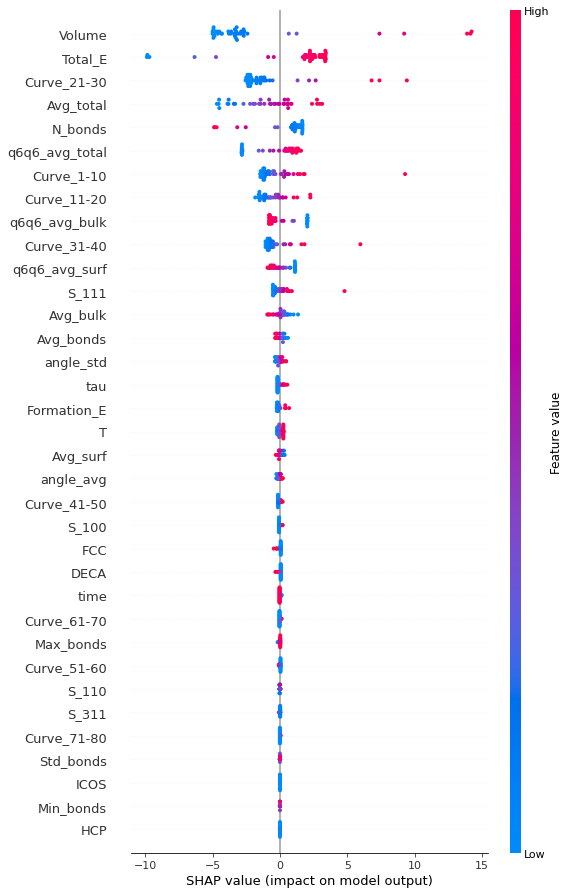

In [53]:
shap.plots.beeswarm(best_10,max_display=features_num)

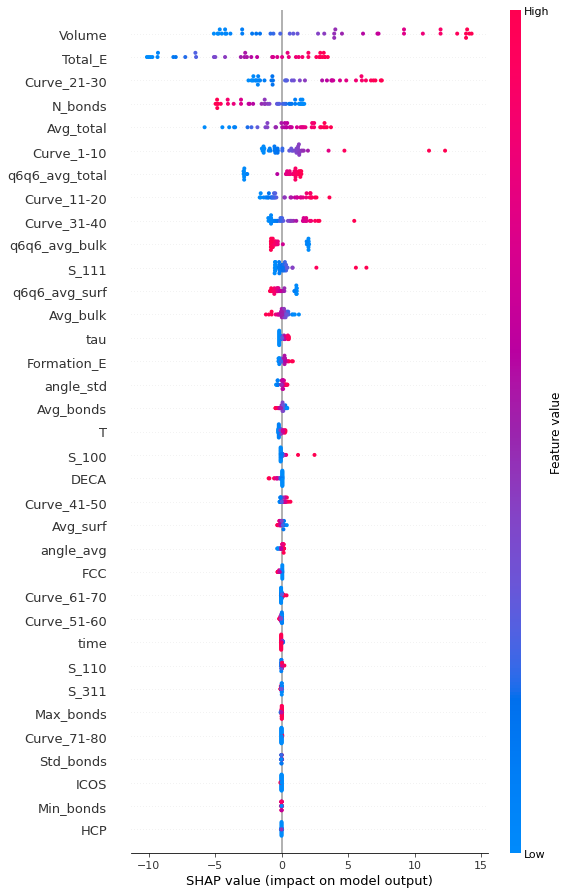

In [54]:
shap.plots.beeswarm(worst_10,max_display=features_num)

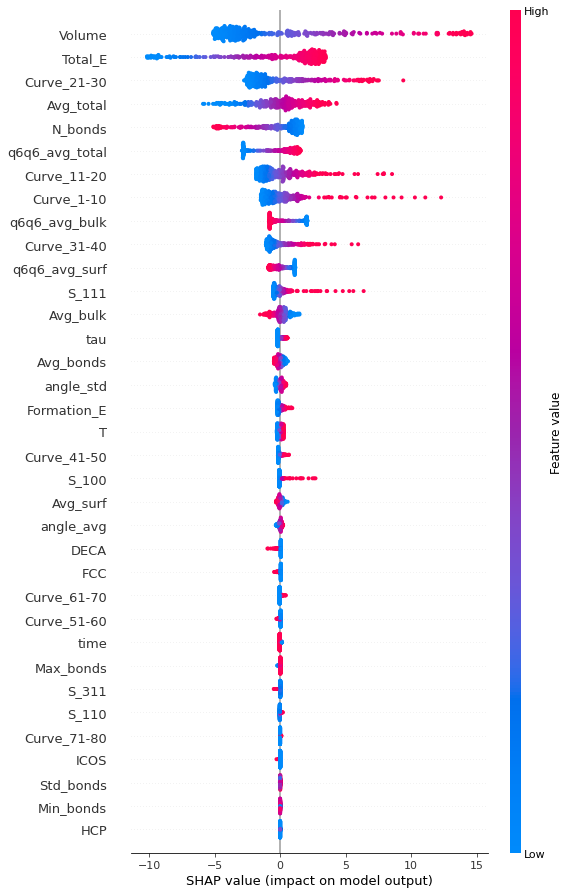

In [55]:
shap.plots.beeswarm(shap_values,max_display=features_num)

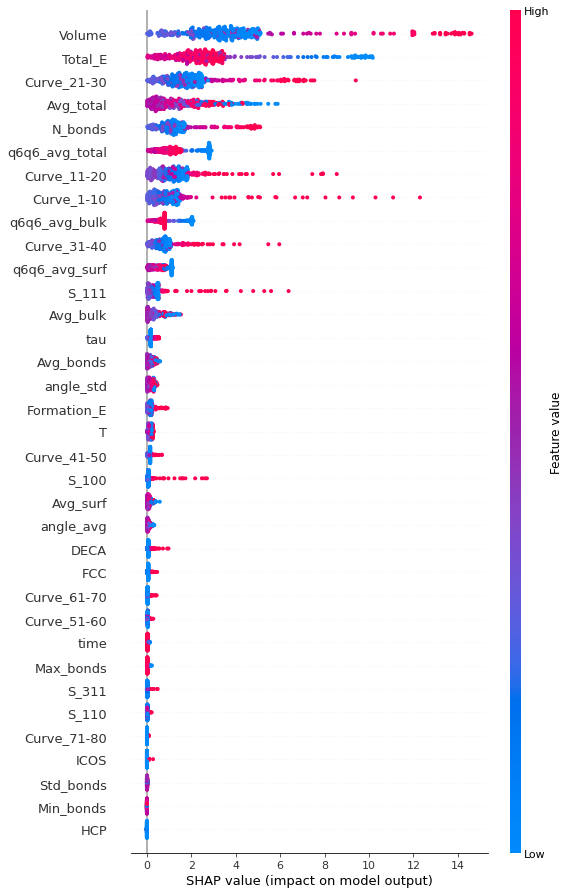

In [56]:
shap.plots.beeswarm(shap_values.abs, max_display=features_num)
